### 모듈 불러오기

In [1]:
import pandas as pd
import numpy as np
import os
import urllib.request

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Waeing
import sys, warnings
if not sys.warnoptions: warnings.simplefilter("ignore")

- 비용함수를 최소화하는 지점을 찾는 방법


Gradient Descent  
    - Batch Gradient Descent(BGD)   
    - Stochastic Gradient Descent(SGD)  
    - Mini Batch Gradient Descent

## 선형회귀

### Gradient Descent (경사하강법)

In [2]:
# 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

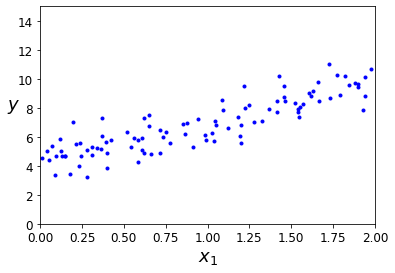

In [3]:
# 데이터 확인
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, # epoch
                       tol=1e-3, # 한epoch당 설정값보다 적게 손실이 줄어들때까지 실행
                       penalty=None, # 규제설정 ex) 'l1', 'l2'  -> 비용함수에 규제항을 더해줌
                       eta0=0.1, # Lrarning rate
                       random_state=42)
# 학습
sgd_reg.fit(X, y.ravel())
# 확인
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

## 다항회귀

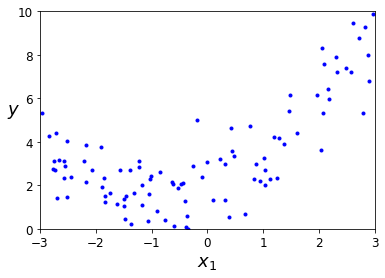

In [5]:
# 데이터 생성
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
# 데이터확인
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

    - LinearRegression 모델은 선형모델이지만 PolynomialFeatures를 통하여 특성을 추가하여 비선형으로 예측할 수도 있음

In [6]:
# 학습 여부를 그래프를 통해서 확인하는 방법
## 오버피팅 언더피팅을 눈으로 보고 확인할 수 있는 방법
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

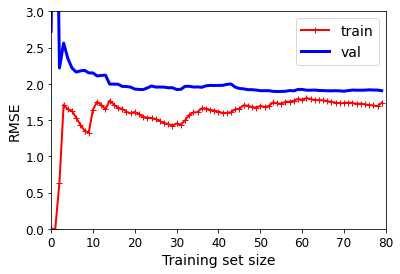

In [7]:
# 적용
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])    # 축을 맞춰줌
plt.show()

    - train과 valid모두 오차 값이 크게 형성되어있는 것을 보았을 때, 과소적합 된 것이라고 판단됨  

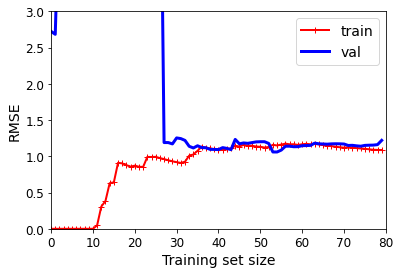

In [8]:
# 다른 적용방법
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), # 데이터에 특성을 추가해줌 (파라미터를 조정해 10차원으로 만들어줌)
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

    - 그래프를 보았을 때, train의 오차가 훨씬 작고, train과 valid의 오차의 차이가 큰 것을 보았을 때, 과대적합된 것을 알 수 있음. 

## 규제가 있는 선형모델

    - sklearn은 full batch gradient descent로 학습. 즉, SGD와 학습 방법이 다를수도 있음 -> 고려해볼만함

- Ridge

In [9]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, # 모델의 자유도 조정 
                  solver="cholesky", 
                  random_state=42)
# 학습
ridge_reg.fit(X, y)
# 확인
ridge_reg.predict([[1.5]])

array([[4.78524575]])

In [10]:
# ridge를 SGD로 사용
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.76586655])

- Lasso

In [11]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.73256717])

In [12]:
# lasso를 SGD로 사용
sgd_reg = SGDRegressor(penalty="l1", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.76585786])

- Elasticnet

In [13]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, # 모델의 자유도 
                         l1_ratio=0.5, # ridge와 lasso의 혼합정도
                         random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.73755097])

    - Lasso는 l1_ratio=1.0인 ElasticNet을 사용 -> 실제로 학습한 값도 똑같음  
      하지만 l1_ratio=0인 Elasticnet은 Ridge와 다름

# 타이타닉 데이터에 적용

속성은 다음과 같은 의미를 가집니다:
* **PassengerId**: 각 승객의 고유 식별자.
* **Survived**: 타깃입니다. 0은 생존하지 못한 것이고 1은 생존을 의미합니다.
* **Pclass**: 승객 등급. 1, 2, 3등석.
* **Name**, **Sex**, **Age**: 이름 그대로 의미입니다.
* **SibSp**: 함께 탑승한 형제, 배우자의 수.
* **Parch**: 함께 탑승한 자녀, 부모의 수.
* **Ticket**: 티켓 아이디
* **Fare**: 티켓 요금 (파운드)
* **Cabin**: 객실 번호
* **Embarked**: 승객이 탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)

In [14]:
TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()   

In [15]:
def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [16]:
# `PassengerId` 열을 인덱스 열로 지정
train = load_titanic_data("train.csv").set_index("PassengerId")
test = load_titanic_data("test.csv").set_index("PassengerId")

In [17]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [18]:
# one_hot_encoder 함수 지정
def one_hot_encoder(data):
    # 범주형 변수와 수치형 변수를 분리
    cat_features = data.select_dtypes(include=['object']).columns.to_list()
    num_features = data.select_dtypes(exclude='object').columns.to_list() 
    
    #원핫인코딩
    data_cat = pd.get_dummies(data[cat_features])
    data = pd.concat([data,data_cat],axis=1).drop(columns=[f for f in cat_features])
    return data
# 원핫인코딩
train = one_hot_encoder(train)
test = one_hot_encoder(test)

In [19]:
# 간단한 결측값 처리
## train
train['Age'] = train['Age'].fillna(train['Age'].mode()[0])
## test
test['Age'] = test['Age'].fillna(test['Age'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])

## 로지스틱회귀

In [20]:
# 라벨과 데이터를 분리
y_train = train['Survived']
train = train.drop('Survived', axis=1)

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", 
                             C=10**10, 
                             # -> l1, l2와 같은 규제를 파라미터를 통해 적용가능 -> C의 값이 높을수록 규제가 줄어듦 
                             # -> default값은 l2
                             random_state=42)

In [23]:
log_reg_c1 = LogisticRegression(solver="lbfgs", 
                             C=1, # 규제를 적게 적용해봄
                             random_state=42)

In [26]:
# 기본 교차검증
from sklearn.model_selection import cross_val_score

score = np.mean(cross_val_score(log_reg, train, y_train, cv=5, scoring="accuracy"))
score_c1 = np.mean(cross_val_score(log_reg_c1, train, y_train, cv=5, scoring="accuracy"))

print(f'\
cv score: {score}\n\
cv_score_c1: {score_c1}')

cv score: 0.7990961019396146
cv_score_c1: 0.808072311844831


    - 규제를 한 모델과 규제를 하지 않은 모델의 검증값이 다른것을 알 수 있음

## END